<a href="https://colab.research.google.com/github/szm5417/szm5417/blob/main/2348551_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('/content/insurance.csv')

In [19]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
data.shape

(1338, 7)

In [21]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [23]:
data['smoker'].replace(to_replace='yes', value=1, inplace=True)
data['smoker'].replace(to_replace='no',  value=0, inplace=True)
data['sex'].replace(to_replace='male', value=1, inplace=True)
data['sex'].replace(to_replace='female',  value=0, inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])

In [25]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [26]:
data = pd.get_dummies(data, columns=['region'], prefix='region', drop_first=True)

In [27]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [29]:
y = data['charges']
x = data.drop(columns = ['charges'])

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=110)

In [31]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
y_pred = model.predict(x_train)
mae = mean_absolute_error(y_train, y_pred)
print("Mean Absolute Error (MAE):", mae)
mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
r2 = r2_score(y_train, y_pred)
print("R-squared (R2) score:", r2)
rss = np.sum(np.square(y_train - y_pred))
print("Residual Sum of Squares (RSS):", rss)
explained_variance = explained_variance_score(y_train, y_pred)
print("Explained Variance Score:", explained_variance)

Mean Absolute Error (MAE): 4201.87041209781
Mean Squared Error (MSE): 37249860.70552496
Root Mean Squared Error (RMSE): 6103.266396408153
R-squared (R2) score: 0.7491042069712266
Residual Sum of Squares (RSS): 39857350954.911705
Explained Variance Score: 0.7491042069712266


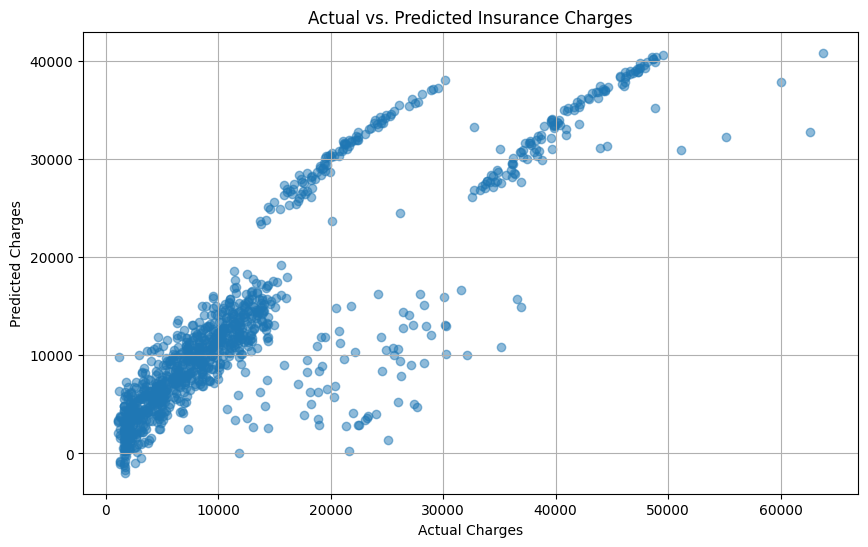

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Insurance Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()